In [1]:
import pandas as pd
import numpy as np



In [2]:
df1 = pd.read_csv('IBM2017.csv', index_col=0)
print(df1.columns)
print(df1.index)
df1.head()

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
Index(['2017-04-17', '2017-04-18', '2017-04-19', '2017-04-20', '2017-04-21',
       '2017-04-24', '2017-04-25', '2017-04-26', '2017-04-27', '2017-04-28',
       ...
       '2020-03-19', '2020-03-20', '2020-03-23', '2020-03-24', '2020-03-25',
       '2020-03-26', '2020-03-27', '2020-03-30', '2020-03-31', '2020-04-01'],
      dtype='object', name='Date', length=746)


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-04-17,25.139999,25.139999,25.139999,25.139999,23.982637,0
2017-04-18,25.139999,25.139999,25.139999,25.139999,23.982637,0
2017-04-19,25.250000,25.250000,25.250000,25.250000,24.087582,2000
2017-04-20,25.240000,25.240000,25.240000,25.240000,24.078035,6300
2017-04-21,25.240000,25.240000,25.240000,25.240000,24.078035,0


In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#from preprocess import train_test_seq#, scale_df
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.pipeline import Pipeline






In [9]:
pip install xgboost


[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [10]:
import xgboost as xgb

In [11]:
# Load the data
try:
    df1 = pd.read_csv('IBM2017.csv', index_col=0)
    print(df1.columns)
    print(df1.index)
    display(df1.head())  # Using 'display' in Jupyter to properly format the DataFrame output
except Exception as e:
    print(f"An error occurred: {e}")

# Note: The previous erroneous line is omitted to prevent further issues.

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
Index(['2017-04-17', '2017-04-18', '2017-04-19', '2017-04-20', '2017-04-21',
       '2017-04-24', '2017-04-25', '2017-04-26', '2017-04-27', '2017-04-28',
       ...
       '2020-03-19', '2020-03-20', '2020-03-23', '2020-03-24', '2020-03-25',
       '2020-03-26', '2020-03-27', '2020-03-30', '2020-03-31', '2020-04-01'],
      dtype='object', name='Date', length=746)


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-04-17,25.139999,25.139999,25.139999,25.139999,23.982637,0
2017-04-18,25.139999,25.139999,25.139999,25.139999,23.982637,0
2017-04-19,25.250000,25.250000,25.250000,25.250000,24.087582,2000
2017-04-20,25.240000,25.240000,25.240000,25.240000,24.078035,6300
2017-04-21,25.240000,25.240000,25.240000,25.240000,24.078035,0


In [12]:
import datetime

# Convert index to DatetimeIndex type 
fixed_dates_df = df1.copy()
fixed_dates_df = fixed_dates_df.set_index(fixed_dates_df.index.to_series().apply(pd.to_datetime))

df1 = fixed_dates_df
print(df1.index)
df1.tail()

DatetimeIndex(['2017-04-17', '2017-04-18', '2017-04-19', '2017-04-20',
               '2017-04-21', '2017-04-24', '2017-04-25', '2017-04-26',
               '2017-04-27', '2017-04-28',
               ...
               '2020-03-19', '2020-03-20', '2020-03-23', '2020-03-24',
               '2020-03-25', '2020-03-26', '2020-03-27', '2020-03-30',
               '2020-03-31', '2020-04-01'],
              dtype='datetime64[ns]', name='Date', length=746, freq=None)


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-03-26,25.280001,25.670000,25.280001,25.660000,25.624987,44800
2020-03-27,25.520000,25.719999,25.520000,25.559999,25.525122,32000
2020-03-30,25.440001,25.719999,25.440001,25.650000,25.615000,64400
2020-03-31,25.700001,25.700001,25.490000,25.650000,25.615000,129100
2020-04-01,25.370001,25.450001,25.240000,25.450001,25.450001,67500


<AxesSubplot: xlabel='Date'>

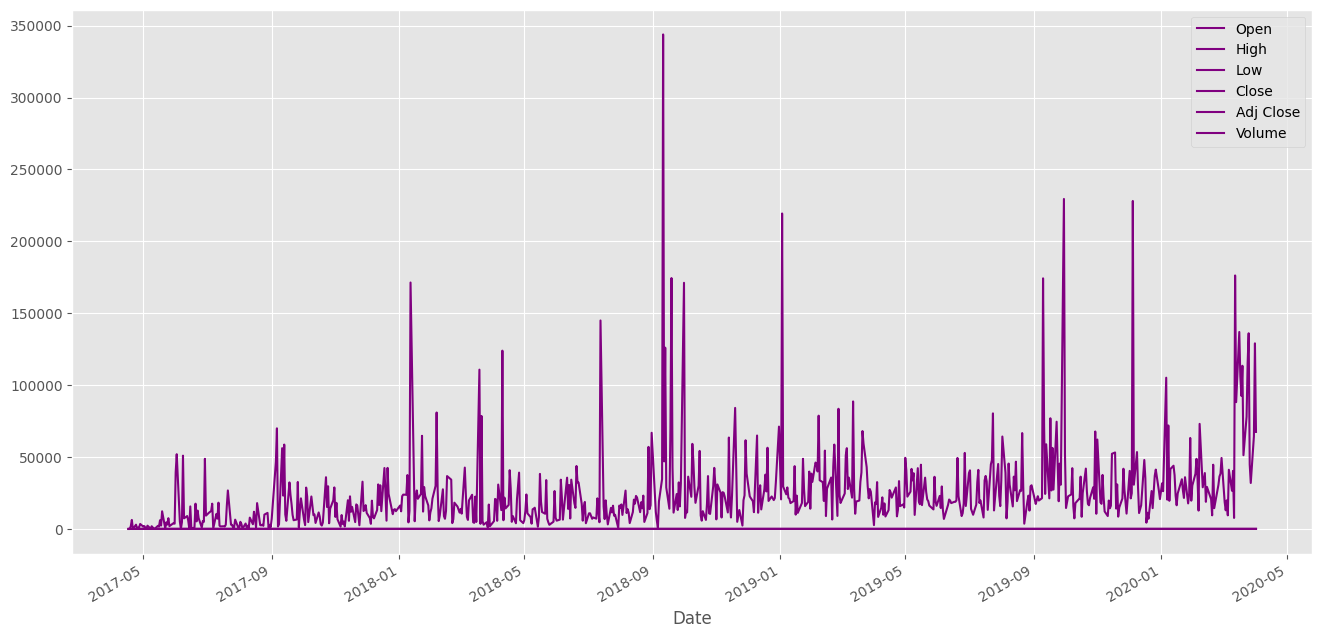

In [14]:

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
plt.style.use("ggplot")
plt.rcParams['figure.figsize'] = [16, 8]

df1.plot(color="purple")

In [15]:
import pandas as pd
import numpy as np

# Load the data
df1 = pd.read_csv('IBM2017.csv', index_col=0)

# Convert index to DatetimeIndex type
fixed_dates_df = df1.copy()
fixed_dates_df = fixed_dates_df.set_index(fixed_dates_df.index.to_series().apply(pd.to_datetime))
df1 = fixed_dates_df

# Split train, test data
# Since this is a single step forecast, only the last index is removed from training dataset
train_seq1 = df1[-201:-1]['Close'] # LSTM perform best between 200 ~ 400 datapoints
test_seq1 = df1.iloc[-1]['Close']
print(type(train_seq1))
print("Shape of dataset: ", train_seq1.shape)
print("train", train_seq1.tail())
print("test", test_seq1)

<class 'pandas.core.series.Series'>
Shape of dataset:  (200,)
train Date
2020-03-25    25.040001
2020-03-26    25.660000
2020-03-27    25.559999
2020-03-30    25.650000
2020-03-31    25.650000
Name: Close, dtype: float64
test 25.450000762939453


In [17]:
from numpy import array

# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
    x, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        x.append(seq_x)
        y.append(seq_y)
    return array(x), array(y) # x = [samples, timesteps]

In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score, median_absolute_error
from sklearn.metrics import make_scorer

In [20]:
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100 

mape = make_scorer(mean_absolute_percentage_error, 
                   greater_is_better=False)
  

In [22]:
# SMAPE is typically defined such that its maximum value
# (for y_pred = 0) will be 200% 
# I have removed the factor 2 to reduce it to [0,100] range
# https://en.wikipedia.org/wiki/Symmetric_mean_absolute_percentage_error

def symmetric_mape(y_true, y_pred, eps = 1e-8):
    summ = ((np.abs(y_true) + np.abs(y_pred)) + eps)
    return np.mean(np.abs(y_pred - y_true) / summ) * 100

smape = make_scorer(symmetric_mape, 
                    greater_is_better=False), 

In [23]:
def print_scores(y_test, y_pred):
    print(f"R2 score: {r2_score(y_test, y_pred)}")
    print(f"MSE score: {mean_squared_error(y_test, y_pred)}")
    print(f"MAE score: {mean_absolute_error(y_test, y_pred)}")
    print(f"Median AE score: {median_absolute_error(y_test, y_pred)}")
    print(f"MAPE score: {mean_absolute_percentage_error(y_test, y_pred)}")
    print(f"SMAPE score: {symmetric_mape(y_test, y_pred)}")

In [24]:
df1.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-04-17,25.139999,25.139999,25.139999,25.139999,23.982637,0
2017-04-18,25.139999,25.139999,25.139999,25.139999,23.982637,0
2017-04-19,25.250000,25.250000,25.250000,25.250000,24.087582,2000
2017-04-20,25.240000,25.240000,25.240000,25.240000,24.078035,6300
2017-04-21,25.240000,25.240000,25.240000,25.240000,24.078035,0


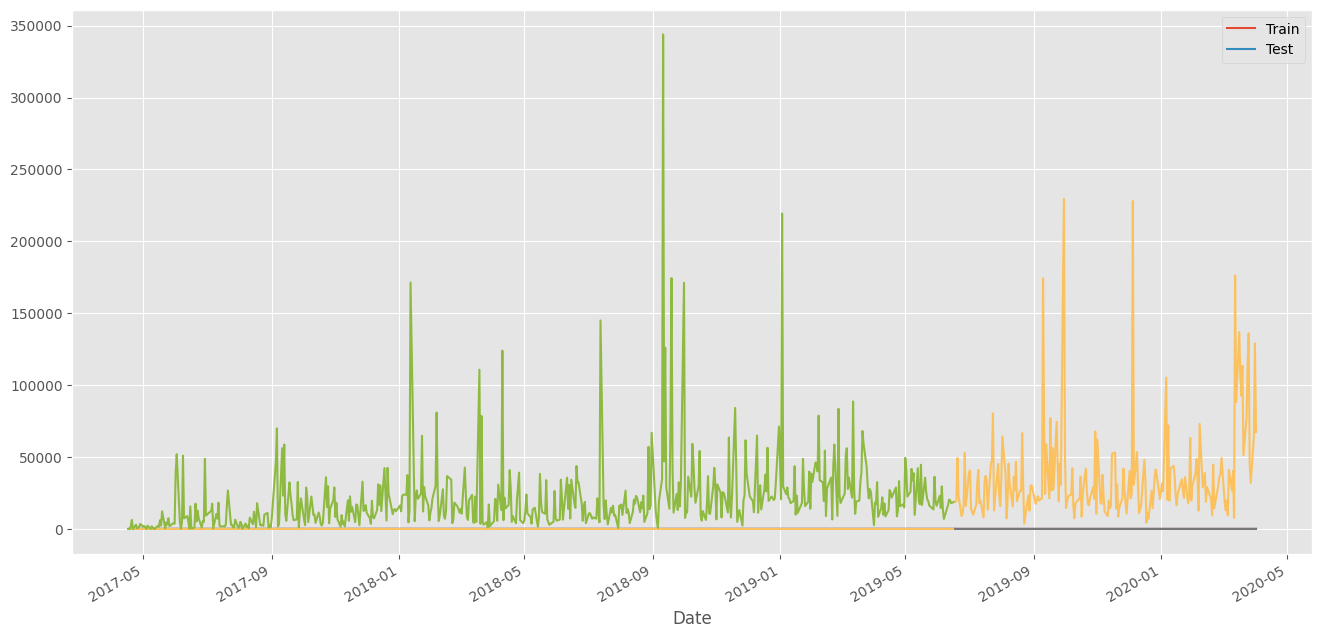

In [25]:
# Split the data into a train and test set
#df_train, df_test = df1.iloc[:-250], df1.iloc[-250:]
df_train, df_test = df1.iloc[:-200], df1.iloc[-200:]

# Create an axis
fig, ax = plt.subplots()

# Plot the train and test setsa dn show
df_train.plot(ax=ax)
df_test.plot(ax=ax)
#plt.axvline(x=4000, color='k', linestyle='--')
ax.legend(["Train", "Test"]);
plt.show()

In [26]:
X_train = df_train[-300:-200].to_numpy().reshape(-1,1)
X_test  = df_train[-200:-100].to_numpy().reshape(-1,1)

y_train = df_train[-200:-100].to_numpy().ravel()
y_test  = df_train[-100:].to_numpy().ravel() 

In [27]:
y_base1 = np.copy(y_test)
y_base1[:] = y_test[0]

In [28]:
print_scores(y_test, y_base1)

R2 score: -0.14056024097924102
MSE score: 173827418.6643414
MAE score: 4628.477104317347
Median AE score: 0.220001220703125
MAPE score: 17.35001841487849
SMAPE score: 16.97681712507406


In [45]:
y_test  =df_train[-200:-100].to_numpy().ravel()


y_base2 = df_train[-100:].to_numpy().ravel()

In [46]:
print_scores(y_test, y_base2)

R2 score: 0.38480759294667144
MSE score: 322902466.9615758
MAE score: 3888.812319100698
Median AE score: 0.6233510971069354
MAPE score: 23.387009768648483
SMAPE score: 6.380146157035645


In [47]:
pipe_lasso = Pipeline([
                       #('scale', MinMaxScaler(feature_range=(0, 1))),
                       ('scale', StandardScaler()),
                       ('lasso', Lasso())
                       ])

pipe_rf = Pipeline([
                    #('scale', MinMaxScaler(feature_range=(0, 1))),
                    ('scale', StandardScaler()),
                    ('rf', RandomForestRegressor(random_state=42))
                    ])

pipe_xgb = Pipeline([
                    #('scale', MinMaxScaler(feature_range=(0, 1))),
                    ('scale', StandardScaler()),
                    ('xgb', xgb.XGBRegressor())
                    ])

In [48]:
params_lasso = {'lasso__alpha': np.logspace(-4,1,10)}
              
params_rf = {
             #'rf__criterion': ['mae', 'mse'],
             'rf__max_depth': [2, 4, 8],
             #'rf__max_features': ['auto', 'sqrt', None],
             'rf__min_samples_leaf': [2, 4, 8],
             'rf__n_estimators': [8, 16, 32, 64]
            }

params_xgb = {
              'xgb__learning_rate': [0.001,0.01,0.1,0.25],
              'xgb__max_depth': [4,8,16],
              'xgb__subsample': [0.6,0.8],
              'xgb__colsample_bytree': [0.4,0.6,0.8],
              'xgb__n_estimators': [32,64,128],
              'xgb__seed': [1337]
             }

In [50]:

my_cv = TimeSeriesSplit(n_splits=2).split(X_train)

gs_lasso = GridSearchCV(pipe_lasso,
                        param_grid=params_lasso,
                        scoring='neg_mean_absolute_error',
                        cv=my_cv,
                        n_jobs=4) 

In [51]:
# Fit to the training set
gs_lasso.fit(X_train,y_train)

# Predict
y_pred_lasso = gs_lasso.predict(X_test)

# Compute and print the metrics
print(f"Tuned Lasso Alpha: {gs_lasso.best_params_}")
print(f"Tuned Lasso Score: {gs_lasso.score(X_test, y_test)}")

Tuned Lasso Alpha: {'lasso__alpha': 0.0001}
Tuned Lasso Score: -4701.9213069505495


In [52]:
print_scores(y_test, y_pred_lasso)

R2 score: 0.8757146096731686
MSE score: 65234971.50434978
MAE score: 4701.9213069505495
Median AE score: 3922.245792781765
MAPE score: 13205.55791290672
SMAPE score: 84.09190269121518


In [53]:
my_cv = TimeSeriesSplit(n_splits=2).split(X_train)

gs_rf = GridSearchCV(estimator=pipe_rf,
                     param_grid=params_rf,
                     scoring='neg_mean_absolute_error',
                     cv=my_cv, 
                     n_jobs=4)

In [54]:
# Fit to the training set
gs_rf.fit(X_train,y_train)

# Predict
y_pred_rf = gs_rf.predict(X_test)

# Compute and print the metrics
print(f"Tuned RF params: {gs_rf.best_params_}")
print(f"Tuned RF Score:  {gs_rf.score(X_test, y_test)}")

Tuned RF params: {'rf__max_depth': 2, 'rf__min_samples_leaf': 8, 'rf__n_estimators': 64}
Tuned RF Score:  -4101.388519328671


In [55]:
print_scores(y_test, y_pred_rf)

R2 score: 0.26798541878089965
MSE score: 384220142.2147956
MAE score: 4101.388519328671
Median AE score: 0.1888084732947526
MAPE score: 230.90984836387364
SMAPE score: 16.345888827197317


In [56]:
my_cv = TimeSeriesSplit(n_splits=2).split(X_train)

#xgb.XGBRegressor()
gs_xgb = GridSearchCV(estimator=pipe_xgb,
                     param_grid=params_xgb,
                     scoring='neg_mean_absolute_error',
                     cv=my_cv, 
                     n_jobs=4)

In [57]:
# Fit to the training set
gs_xgb.fit(X_train,y_train)

# Predict
y_pred_xgb = gs_xgb.predict(X_test)

# Compute and print the metrics
print(f"Tuned XGB params: {gs_xgb.best_params_}")
print(f"Tuned XGB Score:  {gs_xgb.score(X_test, y_test)}")

Tuned XGB params: {'xgb__colsample_bytree': 0.4, 'xgb__learning_rate': 0.1, 'xgb__max_depth': 4, 'xgb__n_estimators': 32, 'xgb__seed': 1337, 'xgb__subsample': 0.6}
Tuned XGB Score:  -4922.778922274907


In [58]:
print_scores(y_test, y_pred_xgb)

R2 score: 0.11864685568760991
MSE score: 462605034.2948112
MAE score: 4922.778922274907
Median AE score: 210.67737197875977
MAPE score: 1219.0948512066057
SMAPE score: 74.49272240101708


In [59]:
y_pred_lasso.shape, y_pred_rf.shape, y_pred_xgb.shape

((600,), (600,), (600,))

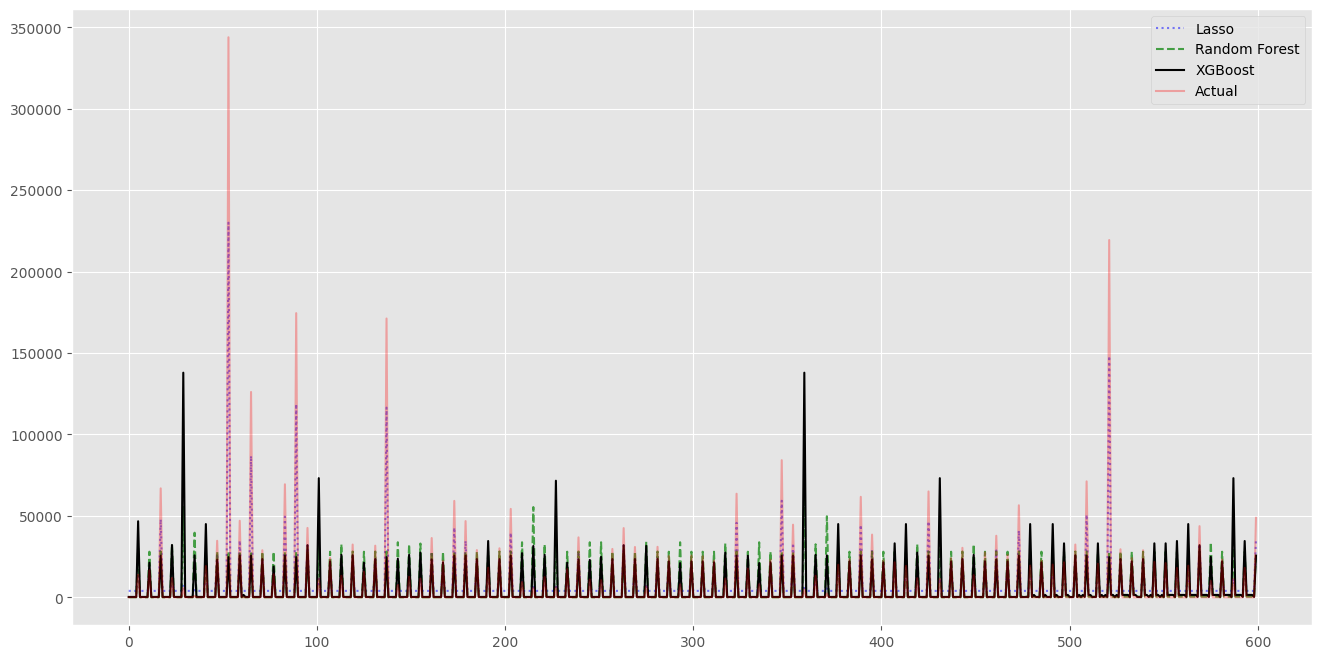

In [60]:
#t_test = np.linspace(4000, 4000+tst_sz, tst_sz)

plt.plot(y_pred_lasso, 'b:', label='Lasso', alpha=0.5)
plt.plot(y_pred_rf, 'g--', label='Random Forest', alpha=0.7)
plt.plot(y_pred_xgb, 'k', label='XGBoost')
plt.plot(y_test, 'r', label='Actual', alpha=0.3)
#plt.plot(y_base1, 'k-.', label='Base1', alpha=0.3)
#plt.plot(y_base2, 'k-.', label='Base2', alpha=0.4)
plt.legend()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=3200c018-013e-401c-92df-5d6f750328fc' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>